In [1]:
import pandas as pd
import numpy as np

# Load the Excel file into a pandas DataFrame
df = pd.read_excel("Granger_Results.xlsx", index_col=0)  # Replace with your actual file path

# Initialize a dictionary to store the results
otherTopicsToInflation = {}

# Part 1: otherTopicsToInflation - Searching in rows ending with 'inflation_y' and columns starting from 'Rappler_economy_x'
for row in df.index:
    if row.endswith('inflation_y'):
        # List to hold tuples of (column name, p-value)
        significant_columns_with_pvalues = []
        
        # Iterate through each column starting from 'Rappler_economy_x'
        start_column = False
        for col in df.columns:
            if col == "Rappler_economy_x":  # Mark the starting column
                start_column = True
            
            if start_column and not col.endswith("inflation_x"):  # Exclude columns ending with 'inflation_x'
                value = df.at[row, col]
                if not pd.isna(value) and value < 0.05:  # Exclude NaN values and check for significance
                    significant_columns_with_pvalues.append((col, value))  # Store the column name and its p-value
        
        # Sort the significant columns by their p-value in ascending order
        if significant_columns_with_pvalues:
            significant_columns_with_pvalues.sort(key=lambda x: x[1])  # Sort by p-value
            # Extract the sorted column names
            sorted_columns = [col for col, p_val in significant_columns_with_pvalues]
            otherTopicsToInflation[row] = sorted_columns  # Store sorted columns in the dictionary


# Now `otherTopicsToInflation` will have the structure [row1: [col1, col2]] with no NaN values

# # Part 2: inflationToOtherTopic - Searching in columns ending with 'inflation_x' and rows that do NOT end with 'inflation_y'
# for col in df.columns:
#     if col.endswith('inflation_x'):
#         inflationToOtherTopic[col] = {}  # Create an object for this column
        
#         # Iterate through each row that does not end with 'inflation_y'
#         for row in df.index:
#             if not row.endswith('inflation_y'):  # Skip rows ending with '_inflation_y
#                 value = df.at[row, col]
#                 if value < 0.05:
#                     inflationToOtherTopic[col][row] = value  # Store the value

# # Convert dictionaries to DataFrames for export
# otherTopicsToInflation_df = pd.DataFrame.from_dict(otherTopicsToInflation, orient='index')
# inflationToOtherTopic_df = pd.DataFrame.from_dict(inflationToOtherTopic, orient='index')

# otherTopicsToInflation_df
# Write the results to an Excel file with two sheets
# with pd.ExcelWriter("Inflation_Results.xlsx") as writer:
#     otherTopicsToInflation_df.to_excel(writer, sheet_name='otherTopicsToInflation')
#     inflationToOtherTopic_df.to_excel(writer, sheet_name='inflationToOtherTopic')

df = pd.read_excel("Granger_Results.xlsx", index_col=0)  # Replace with your actual file path

table_data = []


pd.set_option('display.max_rows', None)         # Show all rows
pd.set_option('display.max_columns', None)      # Show all columns
pd.set_option('display.max_colwidth', None)     # Ensure full column width is displayed
# Loop through the dictionary to prepare data for the DataFrame
for row, columns in otherTopicsToInflation.items():
    for col in columns:
        # Append the row, significant column, and its p-value to the table_data
        p_value = df.at[row, col]
        table_data.append([row, col, p_value])

# Create a DataFrame from the tabular data
df_tabular = pd.DataFrame(table_data, columns=["Response Variables (Y)", "Predictors (X)", "p_value"])

df_tabular

,Response Variables (Y),Predictors (X),p_value
0,Business Mirror_inflation_y,GMA News Online_welfare_x,0.0003
1,Business Mirror_inflation_y,ABS-CBN News_foreign_affairs_x,0.0007
2,Business Mirror_inflation_y,Cebu Daily News_technology_x,0.0023
3,Business Mirror_inflation_y,The Manila Times_foreign_affairs_x,0.0029
4,Business Mirror_inflation_y,Business World_welfare_x,0.0059
5,Business Mirror_inflation_y,ABS-CBN News_environment_x,0.0061
6,Business Mirror_inflation_y,GMA News Online_foreign_affairs_x,0.0145
7,Business Mirror_inflation_y,Cebu Daily News_environment_x,0.0202
8,Business Mirror_inflation_y,SunStar Philippines_welfare_x,0.0203
9,Business Mirror_inflation_y,Manila Standard_foreign_affairs_x,0.0212


In [2]:
# Filter the rows where the p_value is less than 0.05
significant_df = df_tabular[df_tabular["p_value"] < 0.05]

# Export the filtered data to a CSV file
significant_df.to_csv("Significant_Results.csv", index=False)

# Optionally, display the filtered DataFrame
significant_df

,Response Variables (Y),Predictors (X),p_value
0,Business Mirror_inflation_y,GMA News Online_welfare_x,0.0003
1,Business Mirror_inflation_y,ABS-CBN News_foreign_affairs_x,0.0007
2,Business Mirror_inflation_y,Cebu Daily News_technology_x,0.0023
3,Business Mirror_inflation_y,The Manila Times_foreign_affairs_x,0.0029
4,Business Mirror_inflation_y,Business World_welfare_x,0.0059
5,Business Mirror_inflation_y,ABS-CBN News_environment_x,0.0061
6,Business Mirror_inflation_y,GMA News Online_foreign_affairs_x,0.0145
7,Business Mirror_inflation_y,Cebu Daily News_environment_x,0.0202
8,Business Mirror_inflation_y,SunStar Philippines_welfare_x,0.0203
9,Business Mirror_inflation_y,Manila Standard_foreign_affairs_x,0.0212


In [3]:
import pandas as pd

# Load the Excel file into a pandas DataFrame
df = pd.read_excel("Granger_Results.xlsx", index_col=0)  # Replace with your actual file path

# Initialize a dictionary to store the results
inflationToOtherTopic = {}

# Part 1: inflationToOtherTopic - Searching in columns ending with 'inflation_x' and rows starting from 'Rappler_economy_y'
for col in df.columns:
    if col.endswith('inflation_x'):  # Check if the column ends with 'inflation_x'
        # List to hold tuples of (row name, p-value)
        significant_rows_with_pvalues = []
        
        # Iterate through each row starting from 'Rappler_economy_y'
        start_row = False
        for row in df.index:
            if row == "Rappler_economy_y":  # Mark the starting row
                start_row = True
            
            if start_row:
                value = df.at[row, col]
                if not pd.isna(value) and value < 0.05:  # Exclude NaN values and check for significance
                    significant_rows_with_pvalues.append((row, value))  # Store the row name and its p-value
        
        # Sort significant rows by their p-value in ascending order
        if significant_rows_with_pvalues:
            significant_rows_with_pvalues.sort(key=lambda x: x[1])  # Sort by p-value
            # Extract the sorted row names
            sorted_rows = [row for row, p_val in significant_rows_with_pvalues]
            inflationToOtherTopic[col] = sorted_rows  # Store sorted rows in the dictionary

# Now inflationToOtherTopic contains {col: [row1, row2]} with rows sorted by p-values

# Initialize a list to hold the table data
table_data_xy = []

# Iterate over the inflationToOtherTopic dictionary
for col, rows in inflationToOtherTopic.items():
    for row in rows:
        # Append the row, significant column, and its p-value to the table_data
        p_value = df.at[row, col]
        table_data.append([col, row, p_value])  # Change order to match desired column names

# Create a DataFrame from the tabular data
df_tabular_xy = pd.DataFrame(table_data, columns=["Response Variables (Y)", "Predictors (X)", "p_value"])

# Display the resulting DataFrame
df_tabular_xy



,Response Variables (Y),Predictors (X),p_value
0,Business Mirror_inflation_y,GMA News Online_welfare_x,0.0003
1,Business Mirror_inflation_y,ABS-CBN News_foreign_affairs_x,0.0007
2,Business Mirror_inflation_y,Cebu Daily News_technology_x,0.0023
3,Business Mirror_inflation_y,The Manila Times_foreign_affairs_x,0.0029
4,Business Mirror_inflation_y,Business World_welfare_x,0.0059
5,Business Mirror_inflation_y,ABS-CBN News_environment_x,0.0061
6,Business Mirror_inflation_y,GMA News Online_foreign_affairs_x,0.0145
7,Business Mirror_inflation_y,Cebu Daily News_environment_x,0.0202
8,Business Mirror_inflation_y,SunStar Philippines_welfare_x,0.0203
9,Business Mirror_inflation_y,Manila Standard_foreign_affairs_x,0.0212


In [4]:
# Initialize a dictionary to store the results
rowToInflationTopics = {}

# Part 1: rowToInflationTopics - Searching in columns ending with 'inflation_x' and rows starting from 'Rappler_economy_y'
start_reading = False  # Flag to indicate when to start reading rows

for row in df.index:
    if row == "Rappler_economy_y":  # Mark the starting row
        start_reading = True
    
    if start_reading:  # Start processing rows from "Rappler_economy_y"
        # List to hold tuples of (column name, p-value)
        significant_cols_with_pvalues = []
        
        # Iterate through each column ending with 'inflation_x'
        for col in df.columns:
            if col.endswith('inflation_x'):  # Check if the column ends with 'inflation_x'
                value = df.at[row, col]
                if not pd.isna(value) and value < 0.05:  # Exclude NaN values and check for significance
                    significant_cols_with_pvalues.append((col, value))  # Store the column name and its p-value
        
        # Sort significant columns by their p-value in ascending order
        if significant_cols_with_pvalues:
            significant_cols_with_pvalues.sort(key=lambda x: x[1])  # Sort by p-value
            # Extract the sorted column names
            sorted_cols = [col for col, p_val in significant_cols_with_pvalues]
            rowToInflationTopics[row] = sorted_cols  # Store sorted columns in the dictionary

# Initialize a list to hold the table data
table_data = []

# Iterate over the rowToInflationTopics dictionary
for row, cols in rowToInflationTopics.items():
    for col in cols:
        # Append the row, significant column, and its p-value to the table_data
        p_value = df.at[row, col]
        table_data.append([row, col, p_value])  # Change order to match desired column names

# Create a DataFrame from the tabular data
df_tabular_xy = pd.DataFrame(table_data, columns=["Significant Rows", "Column (inflation_x)", "p_value"])

# Display the resulting DataFrame
df_tabular_xy


,Significant Rows,Column (inflation_x),p_value
0,Rappler_economy_y,Daily Tribune_inflation_x,0.0018
1,Rappler_economy_y,ABS-CBN News_inflation_x,0.0403
2,Rappler_economy_y,Manila Standard_inflation_x,0.0486
3,Business Mirror_technology_y,ABS-CBN News_inflation_x,0.0079
4,Rappler_technology_y,GMA News Online_inflation_x,0.0071
5,Rappler_technology_y,Daily Tribune_inflation_x,0.0176
6,Philstar.com_technology_y,Daily Tribune_inflation_x,0.0149
7,Philstar.com_technology_y,Manila Standard_inflation_x,0.0173
8,Philstar.com_technology_y,GMA News Online_inflation_x,0.0349
9,Manila Standard_technology_y,Philstar.com_inflation_x,0.0002


In [5]:
# Filter rows where the p_value is less than 0.05
significant_df_xy = df_tabular_xy[df_tabular_xy["p_value"] < 0.05]

# Export the filtered data to a CSV file
significant_df_xy.to_csv("Significant_RowToInflationTopics.csv", index=False)

# Optionally, display the filtered DataFrame
significant_df_xy

,Significant Rows,Column (inflation_x),p_value
0,Rappler_economy_y,Daily Tribune_inflation_x,0.0018
1,Rappler_economy_y,ABS-CBN News_inflation_x,0.0403
2,Rappler_economy_y,Manila Standard_inflation_x,0.0486
3,Business Mirror_technology_y,ABS-CBN News_inflation_x,0.0079
4,Rappler_technology_y,GMA News Online_inflation_x,0.0071
5,Rappler_technology_y,Daily Tribune_inflation_x,0.0176
6,Philstar.com_technology_y,Daily Tribune_inflation_x,0.0149
7,Philstar.com_technology_y,Manila Standard_inflation_x,0.0173
8,Philstar.com_technology_y,GMA News Online_inflation_x,0.0349
9,Manila Standard_technology_y,Philstar.com_inflation_x,0.0002


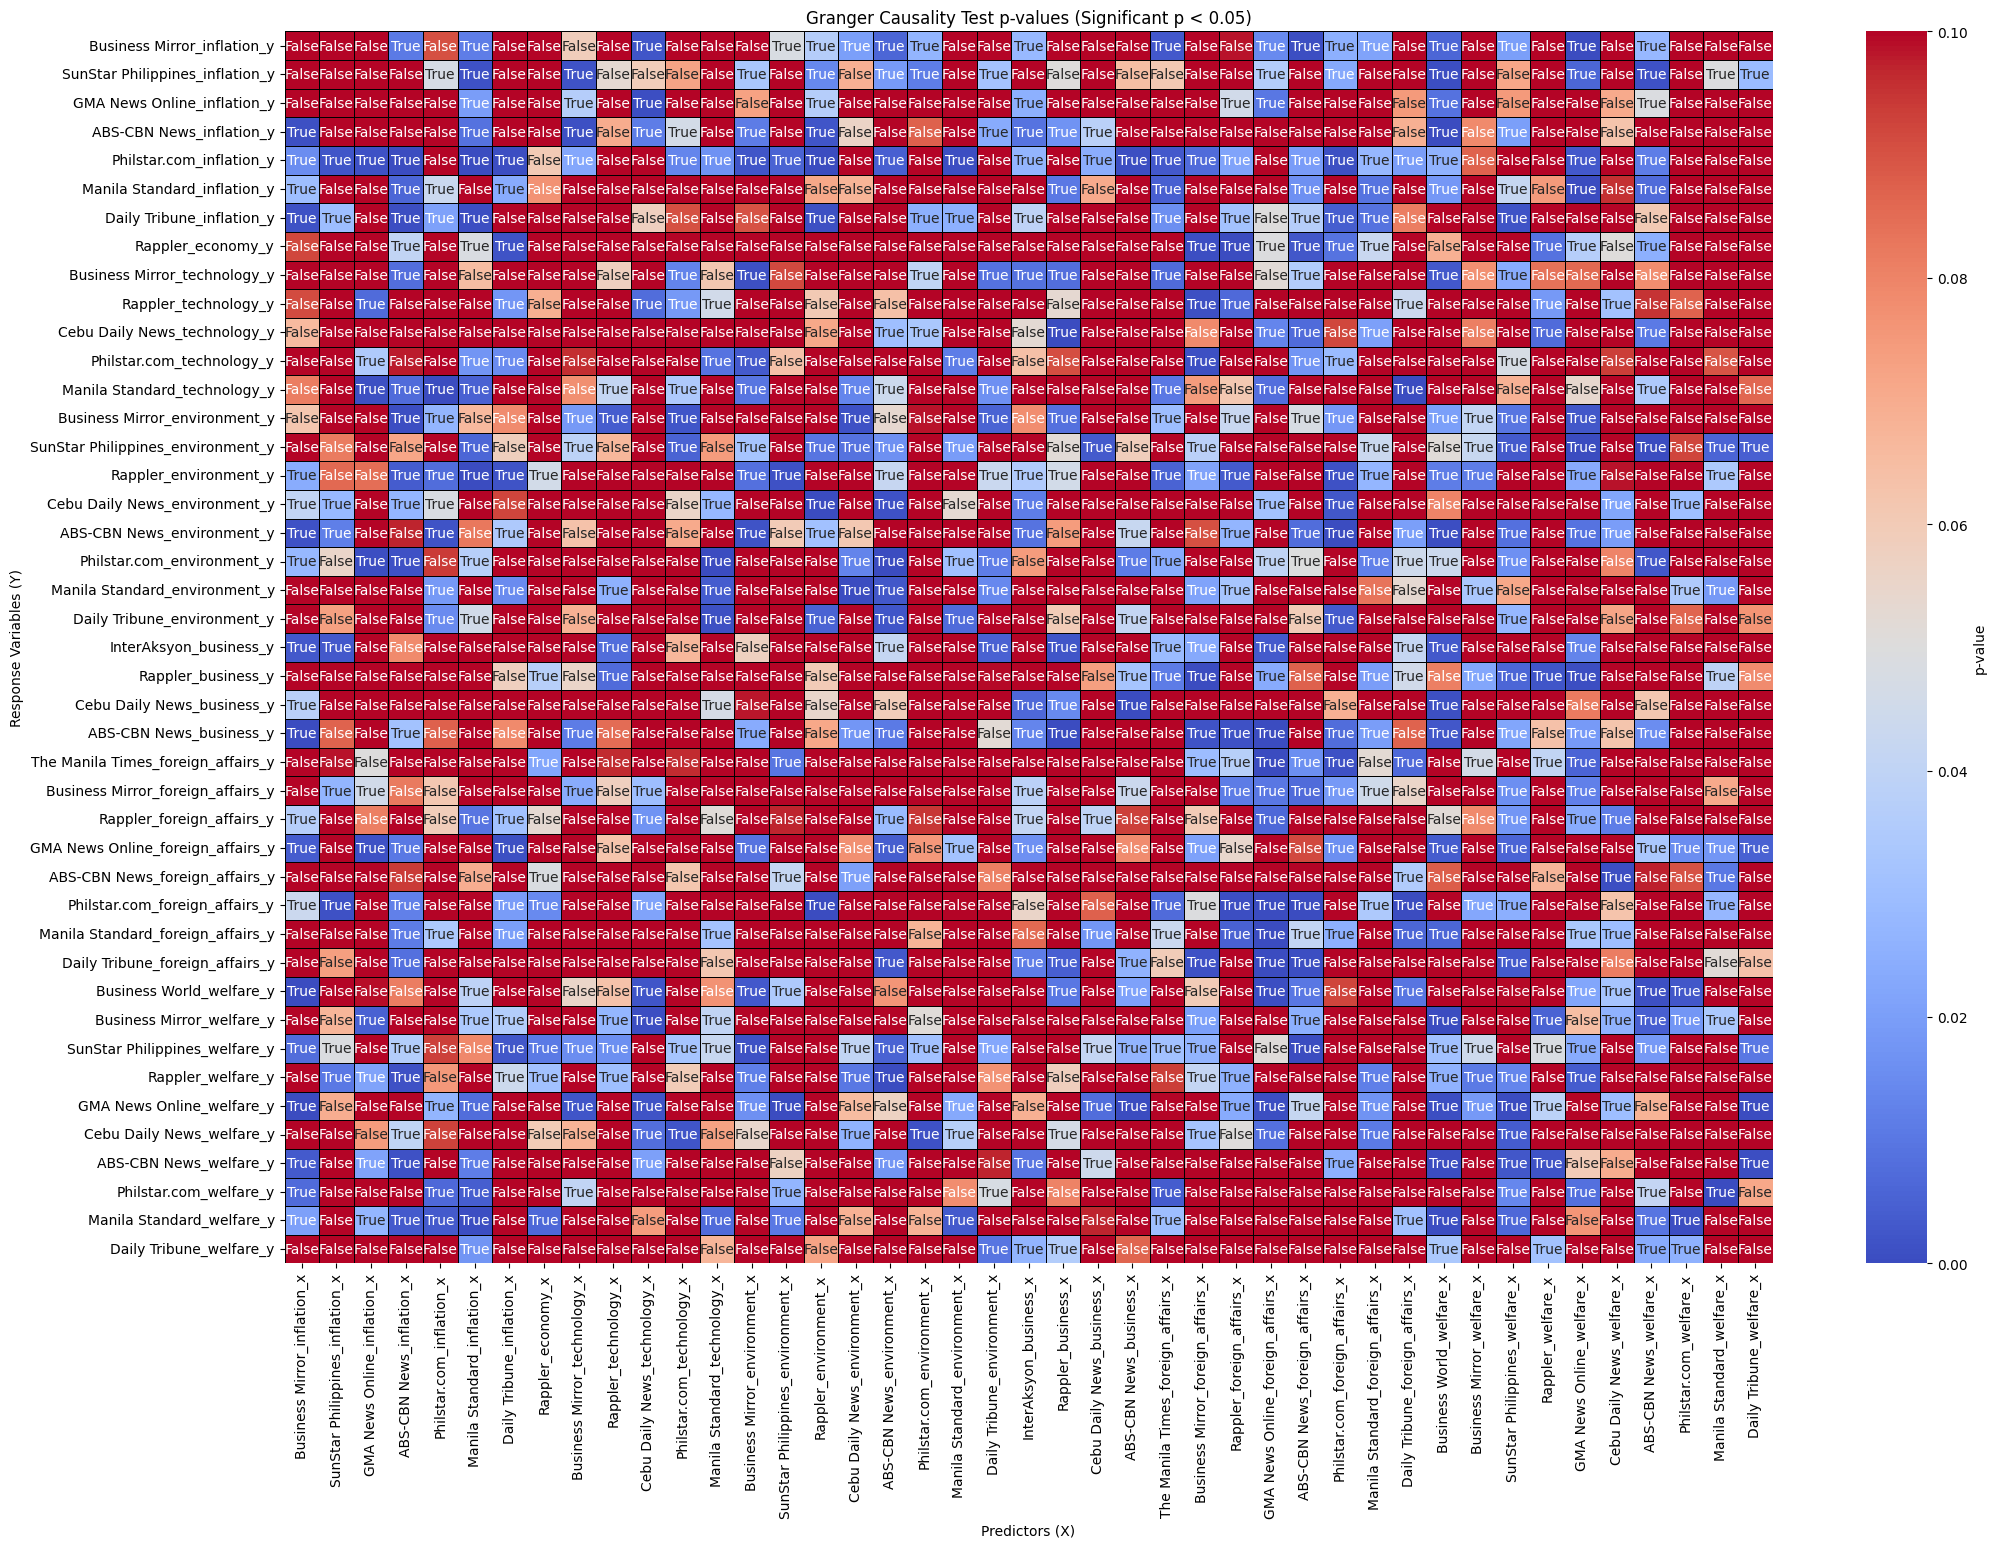

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create the heatmap with a focused color range around 0.05
plt.figure(figsize=(24, 16))
sns.heatmap(df, annot=False, cmap='coolwarm', 
            cbar_kws={'label': 'p-value'}, 
            vmin=0.0, vmax=0.1)  # Focus the color range up to 0.1

# Add annotations to display the p-values in each cell
sns.heatmap(df, annot=df < 0.05, fmt='',
            cmap='coolwarm', vmin=0.0, vmax=0.1, 
            cbar=False, linewidths=0.5, linecolor='black')

# Titles and labels
plt.title('Granger Causality Test p-values (Significant p < 0.05)')
plt.xlabel('Predictors (X)')
plt.ylabel('Response Variables (Y)')

plt.show()

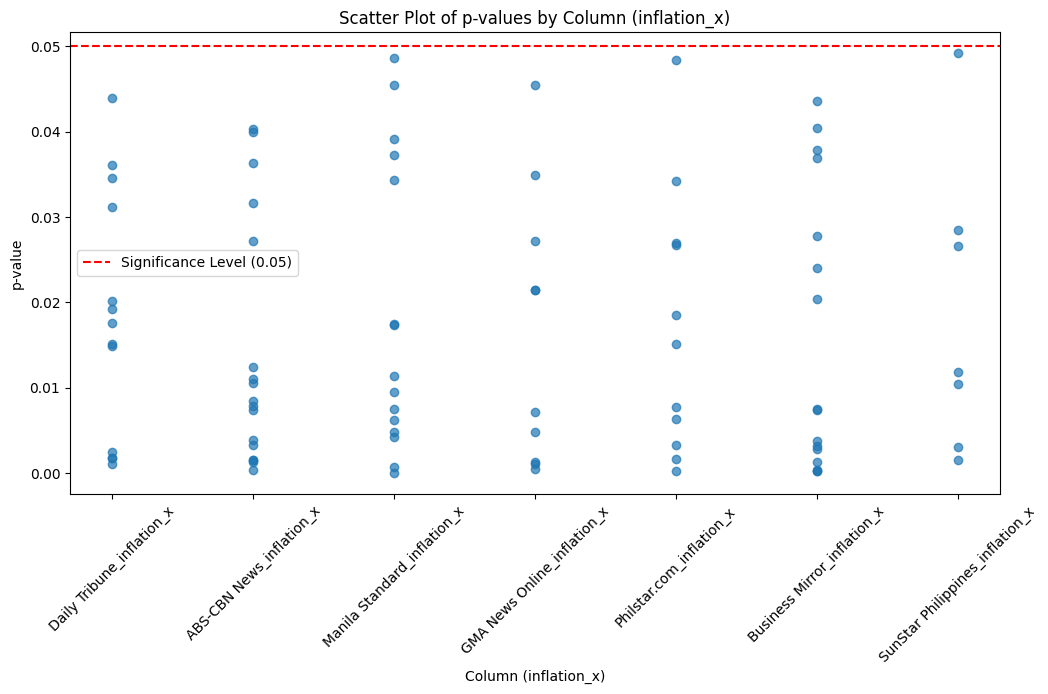

In [22]:
plt.figure(figsize=(12, 6))
plt.scatter(df_tabular_xy['Column (inflation_x)'], df_tabular_xy['p_value'], alpha=0.7)
plt.axhline(y=0.05, color='r', linestyle='--', label='Significance Level (0.05)')
plt.title('Scatter Plot of p-values by Column (inflation_x)')
plt.xlabel('Column (inflation_x)')
plt.ylabel('p-value')
plt.xticks(rotation=45)
plt.legend()
plt.show()